<a href="https://colab.research.google.com/github/waraporn19/MatchingAI2021/blob/main/DB_and_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-data-tables

     |████████████████████████████████| 108 kB 25.3 MB/s 
     |████████████████████████████████| 178 kB 51.8 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 41 kB 537 kB/s 


# Azure-data

1. create DB on azure-data
2. insert data
3.Query

In [2]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [4]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=apiteststorage01;AccountKey=Slu9zvSFOjOUxedCCvA10Zc7dyo4JPYZ61kwMauHj1nizEwyi1R5J1Zz4Pq3eXHD+bhqcqUhkMFyxQyOZAKyPw==;EndpointSuffix=core.windows.net')

#insert data

In [5]:
table_client = table_service.get_table_client(table_name="tabledb")

In [6]:
task = TableEntity()
task[u'PartitionKey'] = u'part1' #แบ่งข้อมูลไปเก็บ
task[u'RowKey'] = u'002' #ห้ามซ้ำ
task[u'name'] = u'stat'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 48, 17, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A48%3A17.4603735Z\'"',
 'version': '2019-02-02'}

insert dictionary

In [8]:
task = {u'PartitionKey': u'part1', u'RowKey': u'003',
           u'name': u'python', u'room': u'online', u'age': 3}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 55, 41, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A55%3A42.2028466Z\'"',
 'version': '2019-02-02'}

#Query

###query by partitionkey&rowkey

In [9]:
table_client = table_service.get_table_client(table_name="tabledb")

In [10]:
task = table_client.get_entity('part1', '002')#ใช้สำหรับดึงข้อมูล 1คน
print(task)

{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'stat', 'age': 30}


In [48]:
for i in range(10):
     task = {u'PartitionKey': u'partQ3', u'RowKey': f'00{i+10}',
            u'name': u'python', u'room': u'online', u'age': i}
     table_client.create_entity(entity=task)

###query by logic 

In [49]:
task = table_client.query_entities(query_filter="age gt 5")
print(task)

<iterator object azure.core.paging.ItemPaged at 0x7fd494033ad0>


In [50]:
for i in task:
     print(i)

{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'stat', 'age': 30}
{'PartitionKey': 'partQ2', 'RowKey': '0016', 'name': 'python', 'room': 'online', 'age': 6}
{'PartitionKey': 'partQ2', 'RowKey': '0017', 'name': 'python', 'room': 'online', 'age': 7}
{'PartitionKey': 'partQ2', 'RowKey': '0018', 'name': 'python', 'room': 'online', 'age': 8}
{'PartitionKey': 'partQ2', 'RowKey': '0019', 'name': 'python', 'room': 'online', 'age': 9}
{'PartitionKey': 'partQ3', 'RowKey': '0016', 'name': 'python', 'room': 'online', 'age': 6}
{'PartitionKey': 'partQ3', 'RowKey': '0017', 'name': 'python', 'room': 'online', 'age': 7}
{'PartitionKey': 'partQ3', 'RowKey': '0018', 'name': 'python', 'room': 'online', 'age': 8}
{'PartitionKey': 'partQ3', 'RowKey': '0019', 'name': 'python', 'room': 'online', 'age': 9}


In [51]:
!pip install azure-cognitiveservices-vision-computervision

In [92]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

credentials = CognitiveServicesCredentials('b87a3c6c93644e36958e61acac1526c9')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials

)

In [101]:
url = "https://apiteststorage01.blob.core.windows.net/testfolder/ดิว.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 24, 'gender': <Gender.female: 'Female'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7fd48aa14490>}


In [102]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)

386 386 250 244


In [103]:
import cv2

In [96]:
from matplotlib import pyplot as plt

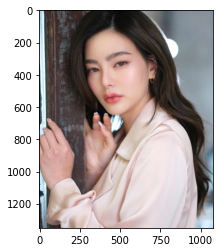

In [105]:
img = cv2.imread('/content/ดิว.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [108]:
img2 = cv2.rectangle(img, (tag.face_rectangle.left,tag.face_rectangle.top),
            (tag.face_rectangle.left+tag.face_rectangle.width,tag.face_rectangle.top+tag.face_rectangle.height),(0,0,255),5)

24
Gender.female


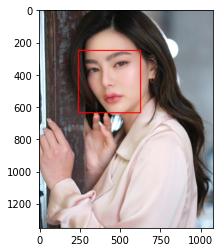

In [109]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)